Iteration  0 : Loss ==> 10.666666666666666
Iteration  1 : Loss ==> 7.576296296296296
Iteration  2 : Loss ==> 6.050548971193415
Iteration  3 : Loss ==> 4.846080866712391
Iteration  4 : Loss ==> 3.8945228127277347
Iteration  5 : Loss ==> 3.14223832355681
Iteration  6 : Loss ==> 2.5470291570138306
Iteration  7 : Loss ==> 2.0756885121892403
Iteration  8 : Loss ==> 1.7020785485622365
Iteration  9 : Loss ==> 1.4056197456886912
Iteration  10 : Loss ==> 1.1701037829797225
Iteration  11 : Loss ==> 0.982760571012852
Iteration  12 : Loss ==> 0.8335249496551175
Iteration  13 : Loss ==> 0.7144602574190486
Iteration  14 : Loss ==> 0.6193051567768334
Iteration  15 : Loss ==> 0.5431173102224592
Iteration  16 : Loss ==> 0.48199316465184583
Iteration  17 : Loss ==> 0.432847549272765
Iteration  18 : Loss ==> 0.3932402855939894
Iteration  19 : Loss ==> 0.3612397519116084
Iteration  20 : Loss ==> 0.3353154999691579
Iteration  21 : Loss ==> 0.31425371444320865
Iteration  22 : Loss ==> 0.2970906358045109
Ite

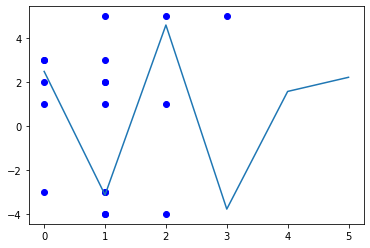

In [7]:
# Task 1: Simple Gradient Descent
# Importing necessary libraries

import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d

# Calculating Squared Loss
def Squared_loss(x, y, W):

  loss = 0

  for i in range(len(x)):
    loss += np.square(np.dot(x[i], W[:len(W)-1]) + W[len(W)-1] - y[i])
  
  return loss/len(x)

# Applying Gradient Descent algortihm
def Gradient_descent(x, y, W, step, criteria):

  # Till max iteration is reached
  for i in range(criteria):

    new_weights = []
    
    # Calculating Loss Function
    print("Iteration ", i, ": Loss ==>", Squared_loss(x, y, W))

    # Calculating Gradients
    for k in range(len(W)):

      new_gradient = 0

      for j in range(len(x)):

        # Calculates Intercept
        if k == len(W) - 1:
          new_gradient += np.dot(x[j], W[:len(W)-1]) + W[len(W)-1] - y[j]
        
        # Calculate Slopes
        else:
          new_gradient += ((np.dot(x[j], W[:len(W)-1]) + W[len(W)-1] - y[j]) * x[j][k])
            
      # Updating Weights:
      new_gradient *= 2/len(x)
      new_w = W[k] - step * new_gradient
      new_weights.append(new_w)
    
    # Updating Weight Vector
    W = new_weights
  print("\nWeight Vector:", W)
  print("Equation: ", W[0], "*x1 + ",W[1], "*x2 +", W[2], "*x3 + ", W[3], "\n")
  return W


# Given Data
x = np.array(([1,0,1], [1,1,0], [2,1,3], [1,2,1], [0,1,2], [0,0,1]))
y = np.array([2, -3, 5, -4, 1, 3])

# Defining Weight Vector
# Initially taking Weight Vector (slopes and intercept) as 0
W = [0, 0, 0, 0]

# Defining Step Size i.e., the learning rate
Step = 0.1

# Defining Stopping Criteria
criteria = 30

# Applying Gradient Descent 
w = Gradient_descent(x, y, W, Step, criteria)

# Plotting Graph and Equation
plt.scatter(x[:,0], y, color ="blue")
plt.scatter(x[:,1], y, color ="blue")
plt.scatter(x[:,2], y, color ="blue")
plt.plot(w[0]*x[:, 0] + w[1]*x[:, 1] + w[2]*x[:, 2] + w[3])

Iteration  0 : Loss ==> 8.5
Iteration  1 : Loss ==> 8.017759999999999
Iteration  2 : Loss ==> 7.609751040000001
Iteration  3 : Loss ==> 7.262114550169599
Iteration  4 : Loss ==> 6.963855283932365
Iteration  5 : Loss ==> 6.7062017883183715
Iteration  6 : Loss ==> 6.482121313432813
Iteration  7 : Loss ==> 6.285948123795015
Iteration  8 : Loss ==> 6.113096516568023
Iteration  9 : Loss ==> 5.959837908100925
Iteration  10 : Loss ==> 5.823126825747961
Iteration  11 : Loss ==> 5.700464488877327
Iteration  12 : Loss ==> 5.589791436862175
Iteration  13 : Loss ==> 5.489402701592134
Iteration  14 : Loss ==> 5.397880543776709
Iteration  15 : Loss ==> 5.314040919584672
Iteration  16 : Loss ==> 5.236890715770183
Iteration  17 : Loss ==> 5.165593457368795
Iteration  18 : Loss ==> 5.099441703028208
Iteration  19 : Loss ==> 5.037834736457926
Iteration  20 : Loss ==> 4.980260466245708
Iteration  21 : Loss ==> 4.926280681413637
Iteration  22 : Loss ==> 4.875518992505169
Iteration  23 : Loss ==> 4.8276509

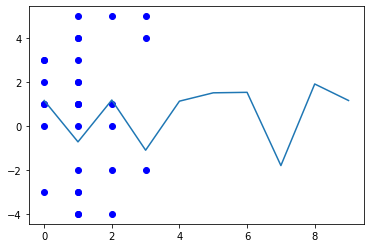

In [8]:
# Task 1 with Stochastic Gradient Descent

# Importing necessary libraries
import numpy as np
import matplotlib.pyplot as plt

# Calculating Squared Loss
def Squared_loss(x, y, W):

  loss = 0

  for i in range(len(x)):
    loss += np.square(np.dot(x[i], W[:len(W)-1]) + W[len(W)-1] - y[i])
  
  return loss/len(x)

def Stochastic_gradient_descent(x, y, W, step, criteria):

  # Getting a random batch for SGD
  batch = np.random.randint(len(x), size = (len(W)))

  for i in range(criteria):

    new_weights = []
    
    # Calculating Loss Function
    print("Iteration ", i, ": Loss ==>", Squared_loss(x, y, W))

    # Calculating Gradients
    for k in range(len(W)):

      new_gradient = 0

      for j in batch:

        # Calculates Intercept
        if k == len(W) - 1:
          new_gradient += np.dot(x[j], W[:len(W)-1]) + W[len(W)-1] - y[j]
        
        # Calculate Slopes
        else:
          new_gradient += ((np.dot(x[j], W[:len(W)-1]) + W[len(W)-1] - y[j]) * x[j][k])
            
      # Updating Weights:
      new_gradient *= 2/len(x)
      new_w = W[k] - step * new_gradient
      new_weights.append(new_w)
    
    # Updating Weight Vector
    W = new_weights

  print("\nEquation: ", W[0], "*x1 + ",W[1], "*x2 +", W[2], "*x3 + ", W[3])
  return W


# Given Data
x = np.array(([1,0,1], [1,1,0], [2,1,3], [1,2,1], [0,1,2], [0,0,1], [1,1,3], [3,2,1], [1,0,2], [1,0,1]))
y = np.array([2, -3, 5, -4, 1, 3, 4, -2, 0, 1])

# Defining Weight Vector
# Initially taking slope and intercept as 0
W = [0, 0, 0, 0]

# Defining Step Size
Step = 0.1

# Defining Stopping Criteria
criteria = 50

# Applying Gradient Descent 
start = time.time()
w = Stochastic_gradient_descent(x, y, W, Step, criteria)
end = time.time()

print("\nTime Taken: ", end-start)

# Plotting Graph
plt.scatter(x[:,0], y, color ="blue")
plt.scatter(x[:,1], y, color ="blue")
plt.scatter(x[:,2], y, color ="blue")
plt.plot(w[0]*x[:, 0] + w[1]*x[:, 1] + w[2]*x[:, 2] + w[3])

In [12]:
import numpy as np
import matplotlib.pyplot as plt
import time

# Calculating Squared Loss
def Squared_loss(x, y, W1):

  loss = 0

  for i in range(len(x)):
    loss += np.square(np.dot(x[i], W1[:len(W)-1]) + W1[len(W)-1] - y[i])
  
  return loss/len(x)

# Applying Gradient descent on artifically generated data
def Gradient_descent(x, y, W1, step, criteria):

  # Till max iteration is reached
  for i in range(criteria):

    new_weights = []
    
    # Calculating Loss Function
    print("Iteration ", i, ": Loss ==>", Squared_loss(x, y, W1))

    # Calculating Gradients
    for k in range(len(W1)):

      new_gradient = 0

      for j in range(len(x)):

        # Calculates Intercept
        if k == len(W1) - 1:
          new_gradient += np.dot(x[j], W1[:len(W1)-1]) + W1[len(W1)-1] - y[j]
        
        # Calculate Slopes
        else:
          new_gradient += ((np.dot(x[j], W1[:len(W1)-1]) + W1[len(W1)-1] - y[j]) * x[j][k])
            
      # Updating Weights:
      new_gradient *= 2/len(x)
      new_w = W1[k] - step * new_gradient
      new_weights.append(new_w)
    
    # Updating Weight Vector
    W1 = new_weights
  print("\nWeight Vector:", W1)

# Given Data
x = []
y = []
data = 100000

# Defining Weight Vector
W = [1, 2, 4, 2, 3 , 5, 7, 2, 1] # To generate artifical data
W1 = [0, 0, 0, 0, 0, 0, 0, 0, 0]

# Creating Random 100,000 Data

for i in range(data):

  # Random Selection
  temp_x = np.random.randint(2, size=(8))
  temp_y = np.dot(temp_x, W[:len(W)-1]) + W[len(W)-1]

  # Creating Noise
  noise = np.random.choice([-1, 1])
  temp_y += noise

  # Creating Data
  x.append(temp_x)
  y.append(temp_y)

# Defining Step Size
Step = 0.1

# Defining Stopping Criteria
criteria = 30

# Applying Gradient Descent 
start = time.time()
Gradient_descent(x, y, W1, Step, criteria)
end = time.time()

print("\nTime Taken: ", end-start)


Iteration  0 : Loss ==> 224.5166
Iteration  1 : Loss ==> 37.34790055624646
Iteration  2 : Loss ==> 11.723805224227593
Iteration  3 : Loss ==> 7.7959251010688835
Iteration  4 : Loss ==> 6.820851039738262
Iteration  5 : Loss ==> 6.282752735652401
Iteration  6 : Loss ==> 5.840588484033571
Iteration  7 : Loss ==> 5.445101275059478
Iteration  8 : Loss ==> 5.08647429157185
Iteration  9 : Loss ==> 4.760485484810771
Iteration  10 : Loss ==> 4.463942528764669
Iteration  11 : Loss ==> 4.194044026014617
Iteration  12 : Loss ==> 3.9482694293883593
Iteration  13 : Loss ==> 3.7243421813832502
Iteration  14 : Loss ==> 3.5202048078943817
Iteration  15 : Loss ==> 3.3339975494662184
Iteration  16 : Loss ==> 3.1640392144998697
Iteration  17 : Loss ==> 3.008809908586637
Iteration  18 : Loss ==> 2.8669354405133998
Iteration  19 : Loss ==> 2.7371732399600592
Iteration  20 : Loss ==> 2.618399639953719
Iteration  21 : Loss ==> 2.5095983916503344
Iteration  22 : Loss ==> 2.4098502919251814
Iteration  23 : Loss

In [13]:
import numpy as np
import matplotlib.pyplot as plt
import time

# Calculating Squared Loss
def Squared_loss(x, y, W1):

  loss = 0

  for i in range(len(x)):
    loss += np.square(np.dot(x[i], W1[:len(W)-1]) + W1[len(W)-1] - y[i])
  
  return loss/len(x)

# Applying Stochastic Gradient Descent
def stochastic_Gradient_descent(x, y, W1, step, criteria):

  # Getting a random 10% batch for SGD
  batch = np.random.randint(len(x), size = (10000))

  for i in range(criteria):

    new_weights = []
    
    # Calculating Loss Function
    print("Iteration ", i, ": Loss ==>", Squared_loss(x, y, W1))

    # Calculating Gradients
    for k in range(len(W1)):

      new_gradient = 0

      for j in batch:

        # Calculates Intercept
        if k == len(W1) - 1:
          new_gradient += np.dot(x[j], W1[:len(W1)-1]) + W1[len(W1)-1] - y[j]
        
        # Calculate Slopes
        else:
          new_gradient += ((np.dot(x[j], W1[:len(W1)-1]) + W1[len(W1)-1] - y[j]) * x[j][k])
            
      # Updating Weights:
      new_gradient *= 2/len(x)
      new_w = W1[k] - step * new_gradient
      new_weights.append(new_w)
    
    # Updating Weight Vector
    W1 = new_weights
  print("\nEquation: ", W1)

# Given Data
x = []
y = []
data = 100000

# Defining Weight Vector
W = [1, 2, 4, 2, 3 , 5, 7, 2, 1] # To generate artifical data
W1 = [0, 0, 0, 0, 0, 0, 0, 0, 0]

# Creating Random 100,000 Data

for i in range(data):

  # Random Data
  temp_x = np.random.randint(2, size=(8))
  temp_y = np.dot(temp_x, W[:len(W)-1]) + W[len(W)-1]

  # Creating Noise
  noise = np.random.choice([-1, 1])
  temp_y += noise

  # Creating Data
  x.append(temp_x)
  y.append(temp_y)

# Defining Step Size
Step = 0.1

# Defining Stopping Criteria
criteria = 30

# Applying stochastic Gradient Descent 
start = time.time()
stochastic_Gradient_descent(x, y, W1, Step, criteria)
end = time.time()

print("\nTime Taken: ", end-start)


Iteration  0 : Loss ==> 225.87783
Iteration  1 : Loss ==> 199.11091210382725
Iteration  2 : Loss ==> 175.63285911676337
Iteration  3 : Loss ==> 155.03867942051804
Iteration  4 : Loss ==> 136.9732579453932
Iteration  5 : Loss ==> 121.12521376695457
Iteration  6 : Loss ==> 107.22151413995624
Iteration  7 : Loss ==> 95.02275181506259
Iteration  8 : Loss ==> 84.31900395564847
Iteration  9 : Loss ==> 74.92620103152555
Iteration  10 : Loss ==> 66.68294288607568
Iteration  11 : Loss ==> 59.447706907953474
Iteration  12 : Loss ==> 53.09640001982947
Iteration  13 : Loss ==> 47.520212143300384
Iteration  14 : Loss ==> 42.62373401331821
Iteration  15 : Loss ==> 38.32330678757234
Iteration  16 : Loss ==> 34.545574905228705
Iteration  17 : Loss ==> 31.226217164941236
Iteration  18 : Loss ==> 28.308834074352756
Iteration  19 : Loss ==> 25.743972226136975
Iteration  20 : Loss ==> 23.48826882575057
Iteration  21 : Loss ==> 21.503701574114434
Iteration  22 : Loss ==> 19.75693093055713
Iteration  23 : L